Análise dos dados

In [271]:
import seaborn as sn

In [272]:
penguins_data = sn.load_dataset('penguins')
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [273]:
species_values = penguins_data['species']

species_values.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [274]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [275]:
penguins_data.duplicated().sum()

0

<Axes: >

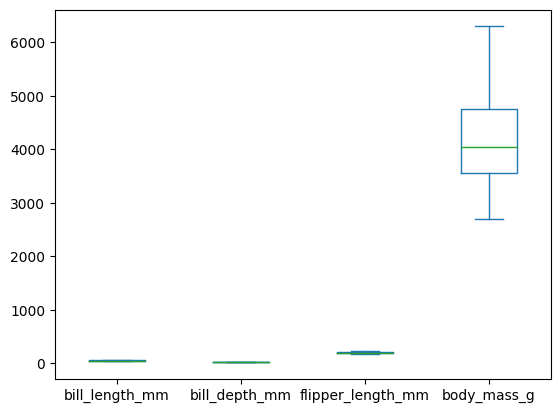

In [276]:
import matplotlib.pyplot as plt

penguins_data_numeric = penguins_data.drop(columns=['species', 'island', 'sex'])

penguins_data_numeric.plot(kind='box')

In [277]:
import seaborn as sns
# Calcular as estatísticas descritivas
estatisticas_descritivas = penguins_data.describe()

# Calcular o valor mínimo e máximo de cada atributo
minimos = penguins_data_numeric.min()
maximos = penguins_data_numeric.max()

# Exibir as estatísticas descritivas
print("Média:")
print(estatisticas_descritivas.mean())
print("\nDesvio Padrão:")
print(estatisticas_descritivas.std())
print("\nVariância:")
print(estatisticas_descritivas.var())
print("\nValor Mínimo:")
print(minimos)
print("\nValor Máximo:")
print(maximos)


Média:
bill_length_mm         76.907064
bill_depth_mm          55.915745
flipper_length_mm     194.997115
body_mass_g          3336.963615
dtype: float64

Desvio Padrão:
bill_length_mm        108.268577
bill_depth_mm         115.743372
flipper_length_mm      89.889339
body_mass_g          1995.699864
dtype: float64

Variância:
bill_length_mm       1.172208e+04
bill_depth_mm        1.339653e+04
flipper_length_mm    8.080093e+03
body_mass_g          3.982818e+06
dtype: float64

Valor Mínimo:
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

Valor Máximo:
bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64


Pré-processamento

In [278]:
# Vamos calcular a moda (valor mais recorrente) de cada coluna
moda_por_coluna = penguins_data.mode().iloc[0]

# Substituir os valores faltantes pela média de cada coluna para as variáveis numéricas
media_por_coluna = penguins_data_numeric.mean()
dados_sem_nulos = penguins_data.fillna(media_por_coluna)

# Substituir os valores faltantes pela moda de cada coluna para a coluna de sexo
dados_sem_nulos['sex'].fillna(moda_por_coluna['sex'], inplace=True)

# Verificar se ainda há valores nulos
dados_sem_nulos.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [279]:
# usando get_dummies ao inves do labelEncoder

dadosEncod = pd.get_dummies(dados_sem_nulos.drop(columns=['species']))

# dadosEncod['target'] = y

dummies_names = []

for i in dadosEncod:
    dummies_names.append(i)
    # print(i)

print(dummies_names)


['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_Female', 'sex_Male']


In [280]:
from sklearn.preprocessing import MinMaxScaler

# Criar o objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar o scaler aos dados
X_scaled = scaler.fit_transform(dadosEncod)

# Criar o DataFrame com os dados escalados
dados_scaled = pd.DataFrame(data=X_scaled, columns=dadosEncod.columns)

# Exibir as primeiras linhas do DataFrame escalado
print(dados_scaled.head(10))


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0        0.254545       0.666667           0.152542     0.291667   
1        0.269091       0.511905           0.237288     0.305556   
2        0.298182       0.583333           0.389831     0.152778   
3        0.429888       0.482282           0.490088     0.417154   
4        0.167273       0.738095           0.355932     0.208333   
5        0.261818       0.892857           0.305085     0.263889   
6        0.247273       0.559524           0.152542     0.256944   
7        0.258182       0.773810           0.389831     0.548611   
8        0.072727       0.595238           0.355932     0.215278   
9        0.360000       0.845238           0.305085     0.430556   

   island_Biscoe  island_Dream  island_Torgersen  sex_Female  sex_Male  
0            0.0           0.0               1.0         0.0       1.0  
1            0.0           0.0               1.0         1.0       0.0  
2            0.0           0.0  

In [283]:
X = dados_scaled
y = dados_sem_nulos['species']

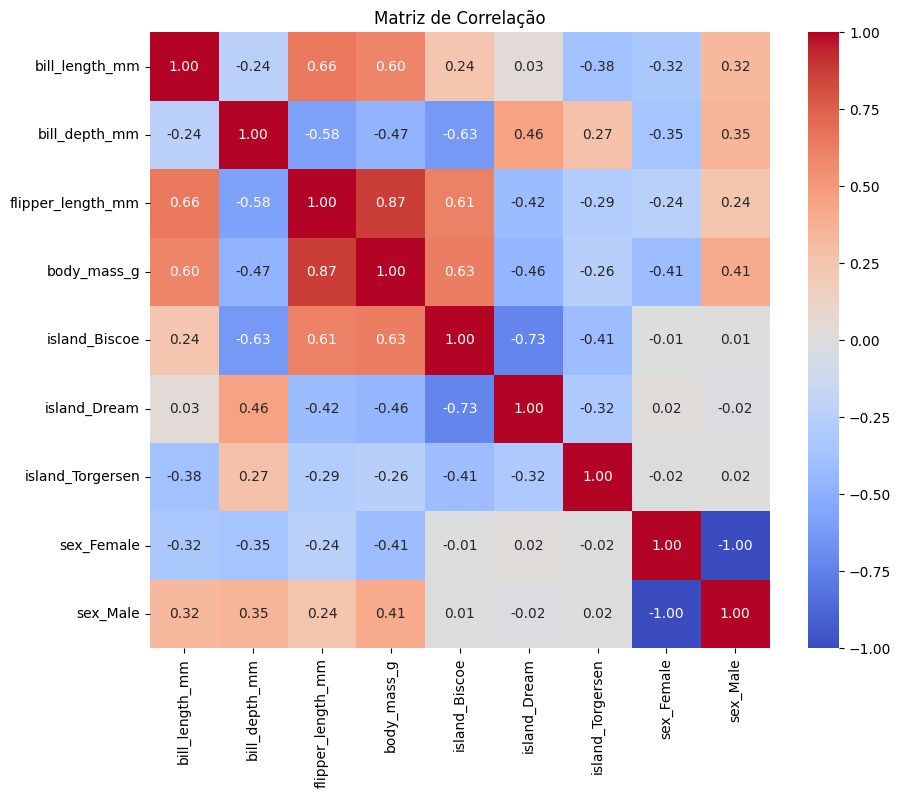

In [284]:
# matriz de correlaçao

# Calcular a matriz de correlação para variáveis numéricas
correlacao = X.corr()
plt.figure(figsize=(10, 8))

# Criar o heatmap da matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")

# Adicionar título ao heatmap
plt.title('Matriz de Correlação')
# Exibir o heatmap
plt.show()


Nesse ponto, ja separamos nossa base de dados entre atributos (X) e classe (y). Além de ja termos trabalhado com os valores nulos.


In [285]:
# Verifique quais características influenciam mais nas 3
# primeiras componentes principais através do PCA

from sklearn.decomposition import PCA
import pandas as pd

# Aplica o PCA
pca = PCA(n_components=3)
pca.fit(X)

# X_pca = pca.transform(X)

# Obtém os componentes principais
componentes_principais = pca.components_

# Obtém os nomes das características originais
nomes_características = list(X.columns)

# Cria um DataFrame para visualizar os resultados
resultados_pca = pd.DataFrame(componentes_principais, columns=nomes_características)
resultados_pca.index = ['1ª Componente', '2ª Componente', '3ª Comoponente']

# Transpõe o DataFrame para ter atributos como linhas e componentes como colunas
resultados_pca = resultados_pca.T

# Exibe os coeficientes dos atributos nos três primeiros componentes principais
print("Coeficientes dos Atributos nos Componentes Principais:")
print("")
print(resultados_pca.abs())


Coeficientes dos Atributos nos Componentes Principais:

                   1ª Componente  2ª Componente  3ª Comoponente
bill_length_mm          0.115120       0.027925        0.203063
bill_depth_mm           0.026630       0.260584        0.108484
flipper_length_mm       0.162154       0.184150        0.142034
body_mass_g             0.197895       0.155190        0.103512
island_Biscoe           0.240002       0.650542        0.215325
island_Dream            0.206526       0.554418        0.542543
island_Torgersen        0.033476       0.096125        0.757868
sex_Female              0.640003       0.258357        0.022658
sex_Male                0.640003       0.258357        0.022658


In [286]:
print(X)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0          0.254545       0.666667           0.152542     0.291667   
1          0.269091       0.511905           0.237288     0.305556   
2          0.298182       0.583333           0.389831     0.152778   
3          0.429888       0.482282           0.490088     0.417154   
4          0.167273       0.738095           0.355932     0.208333   
..              ...            ...                ...          ...   
339        0.429888       0.482282           0.490088     0.417154   
340        0.534545       0.142857           0.728814     0.597222   
341        0.665455       0.309524           0.847458     0.847222   
342        0.476364       0.202381           0.677966     0.694444   
343        0.647273       0.357143           0.694915     0.750000   

     island_Biscoe  island_Dream  island_Torgersen  sex_Female  sex_Male  
0              0.0           0.0               1.0         0.0       1.0  
1        

In [287]:
from sklearn.feature_selection import SelectKBest, chi2

# Escolha uma função de pontuação adequada (por exemplo, f_classif) e aplique SelectKBest
k_best_selector = SelectKBest(score_func=chi2, k=6)
X_selected = k_best_selector.fit_transform(X, y)

# Obtenha as características selecionadas
selected_features = X.columns[k_best_selector.get_support()]

print("Características selecionadas:")
print(selected_features)

novoX = X_selected
novoY = y

Características selecionadas:
Index(['bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe',
       'island_Dream', 'island_Torgersen'],
      dtype='object')


In [288]:
from sklearn.model_selection import ParameterGrid

# DBSCAN + PARAMETERS GRIG

# Definindo os parâmetros a serem testados
param_grid = {'eps': [0.3, 0.5, 0.7, 0.9, 1.0, 1.2, 1.5],
              'min_samples': [4, 5, 8, 10, 12, 15]}

# Criando o grid de parâmetros
grid = ParameterGrid(param_grid)

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

def find_best_dbscan_params(data_attributes, param_grid):
    best_score = -1
    best_params = {}

    all_params = []
    all_scores = []

    for params in ParameterGrid(param_grid):
        dbscan = DBSCAN(**params)
        labels = dbscan.fit_predict(data_attributes)
        unique_labels = np.unique(labels)

        if len(unique_labels) > 1:
            score = silhouette_score(data_attributes, labels)
            all_params.append(params)
            all_scores.append(score)

            if score > best_score:
                best_score = score
                best_params = params

    # Plotando resultados
    plot_clusters(data_attributes, best_params)

    # Plotando pontuação de silhueta
    plot_silhouette_scores(all_params, all_scores)

    return best_params, best_score

def plot_clusters(data_attributes, best_params):
    best_dbscan = DBSCAN(**best_params)
    best_labels = best_dbscan.fit_predict(data_attributes)

    pca = PCA(n_components=2)
    data_attributes_pca = pca.fit_transform(data_attributes)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(data_attributes_pca[:, 0], data_attributes_pca[:, 1], c=best_labels, cmap='viridis')
    plt.title('Clusters Encontrados (Melhores Parâmetros)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.show()

def plot_silhouette_scores(all_params, all_scores):
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(all_scores)), all_scores, marker='o')
    plt.title('Pontuação de Silhueta para Parâmetros Testados')
    plt.xlabel('Configuração')
    plt.ylabel('Silhueta Score')
    plt.xticks(ticks=range(len(all_scores)), labels=[str(params) for params in all_params], rotation=90)
    plt.tight_layout()
    plt.show()


In [290]:
# balancear os dados para ver se melhora o resultado
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_completed_res, y_completed_res = sm.fit_resample(X, y)

y_completed_res.value_counts()

species
Adelie       152
Chinstrap    152
Gentoo       152
Name: count, dtype: int64

base de dados com todos os atributos


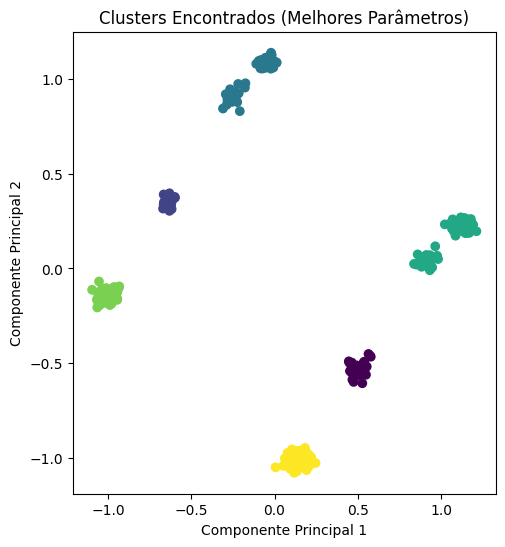

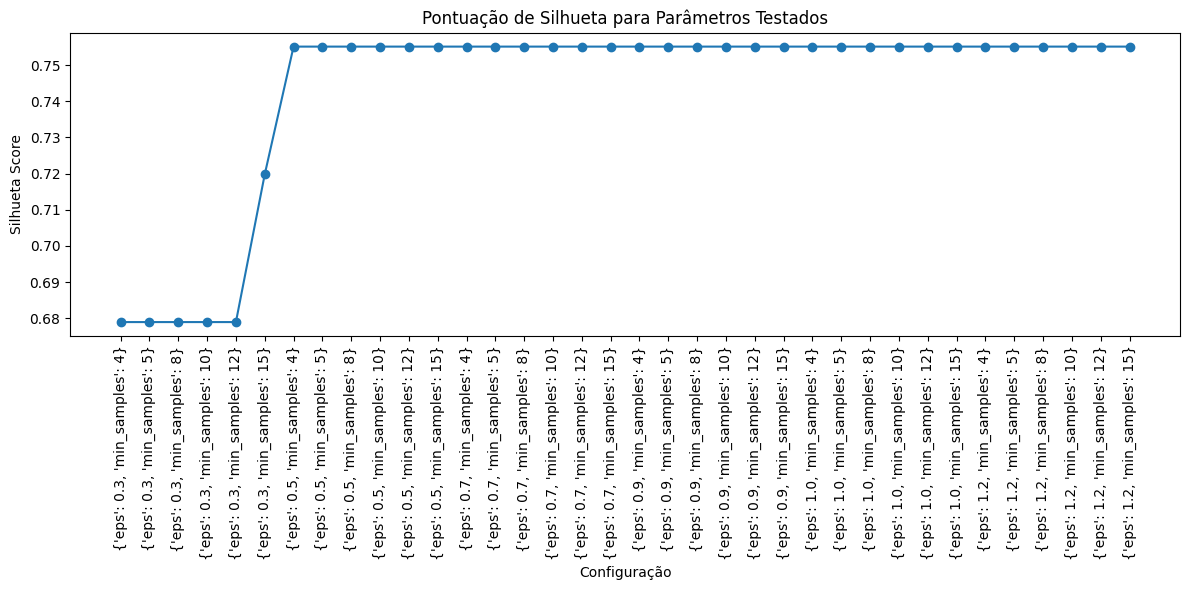

{'eps': 0.5, 'min_samples': 4} 0.7551075833937951
Calinski-Harabasz Score: 1145.7582611342127


In [291]:
from sklearn import metrics

print('base de dados com todos os atributos')
best_params, best_score = find_best_dbscan_params(X_completed_res, param_grid)

best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
best_labels = best_dbscan.fit_predict(X_completed_res)

# Calculando o índice de Calinski-Harabasz
ch = metrics.calinski_harabasz_score(X_completed_res, best_labels)

print(best_params, best_score)
print("Calinski-Harabasz Score:", ch)

IndexError: list index out of range

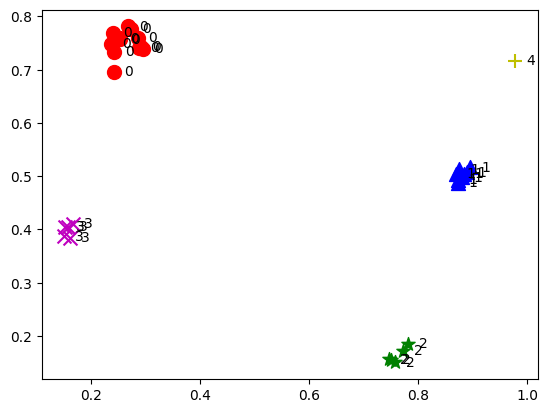

In [294]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Definir lista de cores de acordo com os labels encontrados
col = ['r','b','g','m','y','c']
# Definir marcadores de acordo com os labels encontrados
mar = ['o','^','*','x','+']

# Aplicar DBSCAN nos dados originais
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
best_labels = best_dbscan.fit_predict(X)

# Aplicar PCA aos dados originais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig = plt.figure()
x1 = X_pca[:, 0]
y1 = X_pca[:, 1]
x1 = (x1 - x1.min()) / (x1.max() - x1.min())
y1 = (y1 - y1.min()) / (y1.max() - y1.min())

for i in range(len(x1)):
    k = best_labels[i]
    color = 'k' if k == -1 else col[k]
    marker = 'H' if k == -1 else mar[k]
    plt.scatter(x1[i], y1[i], marker=marker, s=100, c=color)
    plt.text(x1[i] + 0.02, y1[i] + 0.00, '%s' % best_labels[i], ha='left', va='center', fontsize=10)

plt.xlim(-0.1, +1.4)
plt.ylim(-0.1, +1.1)
plt.xlabel('Componente 1 (explica ' + str("{:.2f}".format(100 * pca.explained_variance_ratio_[0])) + '% de variabilidade)', size='large')
plt.ylabel('Componente 2 (explica ' + str("{:.2f}".format(100 * pca.explained_variance_ratio_[1])) + '% de variabilidade)', size='large')
plt.title('DBSCAN')
plt.savefig('DBSCAN.png', bbox_inches=0)
plt.show()


In [292]:
# # balancear os dados para ver se melhora o resultado
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_selected, y)

base de dados com apenas 4 atributos


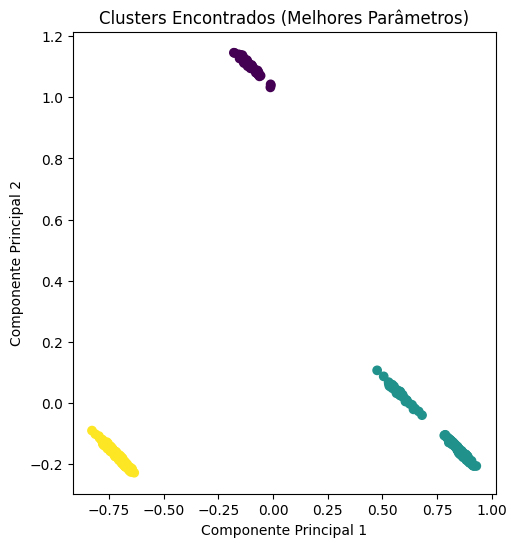

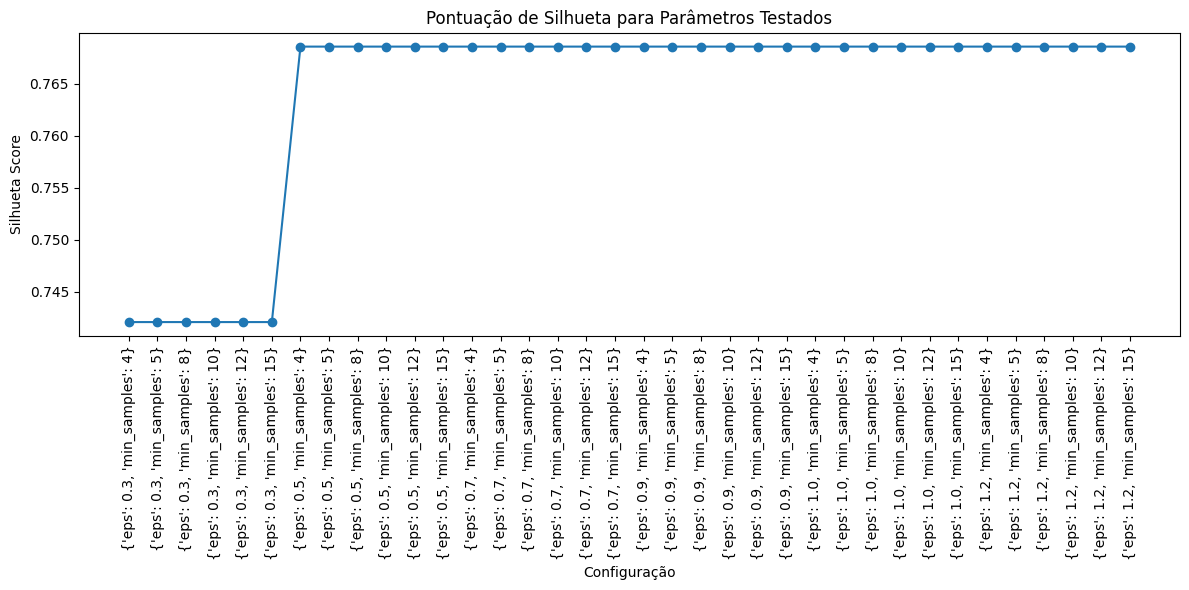

{'eps': 0.5, 'min_samples': 4} 0.76858602529925
Calinski-Harabasz Score: 1745.7046007365127


In [293]:
from sklearn import metrics

print('base de dados com apenas 4 atributos')
best_params, best_score = find_best_dbscan_params(X_res, param_grid)

best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
best_labels = best_dbscan.fit_predict(X_res)

# Calculando o índice de Calinski-Harabasz
ch = metrics.calinski_harabasz_score(X_res, best_labels)

print(best_params, best_score)
print("Calinski-Harabasz Score:", ch)